# Waveform Plotting
- The link to this tutorial can be found [here](https://docs.obspy.org/tutorial/code_snippets/waveform_plotting_tutorial.html)
- Read the files as shown at the Reading Seismograms page. We will use two different ObsPy Stream objects throughout this tutorial. The first one, singlechannel, just contains one continuous Trace and the other one, threechannel, contains three channels of a seismograph.

In [1]:
from obspy.core import read
singlechannel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(singlechannel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


In [2]:
threechannels = read('https://examples.obspy.org/COP.BHE.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHN.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(threechannels)

3 Trace(s) in Stream:
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


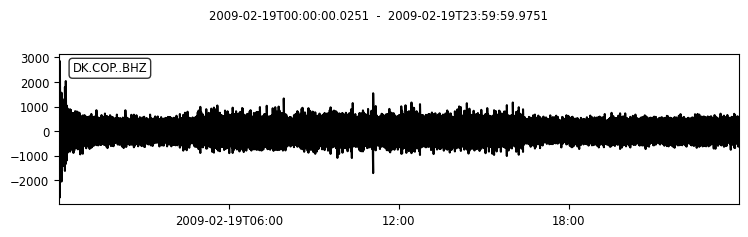

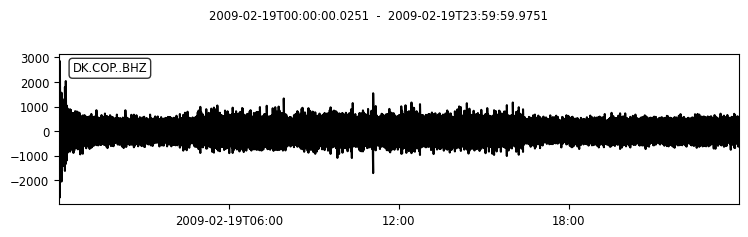

In [3]:
# Basic Plotting
singlechannel.plot()

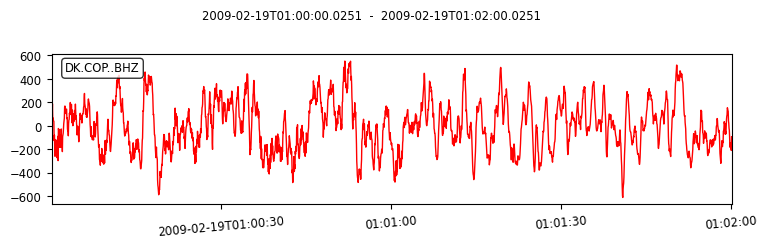

In [4]:
# Customized Plots
dt = singlechannel[0].stats.starttime
singlechannel.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
  starttime=dt + 60*60, endtime=dt + 60*60 + 120, show = False)

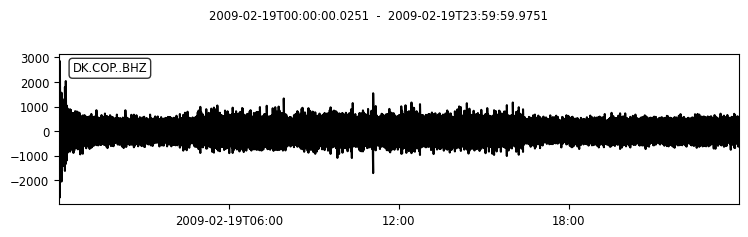

In [5]:
# Saving plot to file
singlechannel.plot(outfile='3_singlechannel.png')

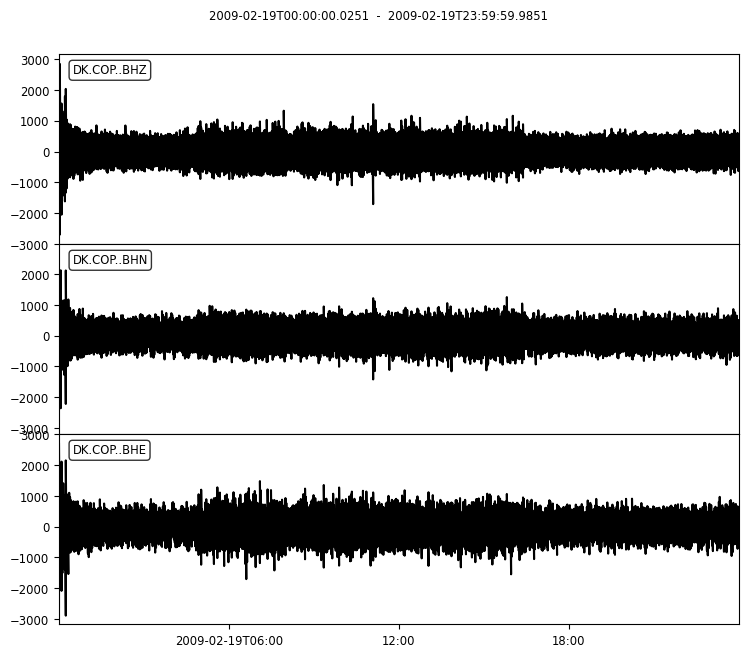

In [6]:
# Plotting multiple channels
threechannels.plot(size=(800, 670), show = False)

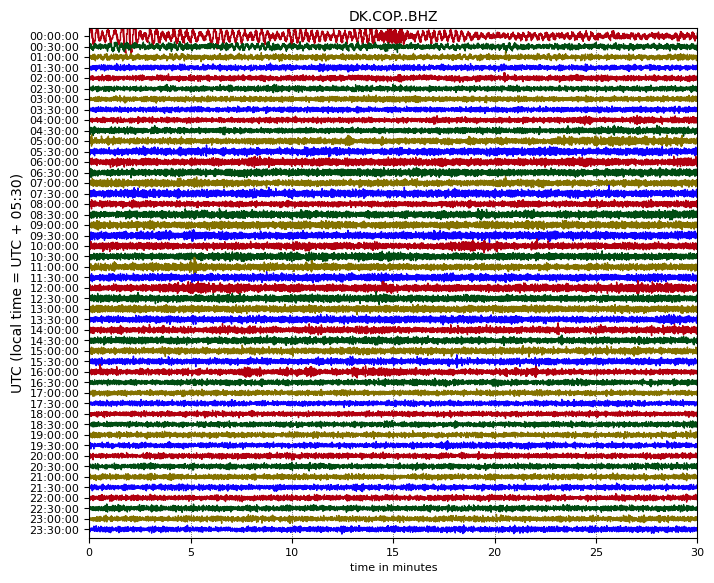

In [7]:
# Creating a One-Day Plot
# https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.plot.html
singlechannel.plot(type='dayplot', one_tick_per_line=True, interval = 30, show = False)

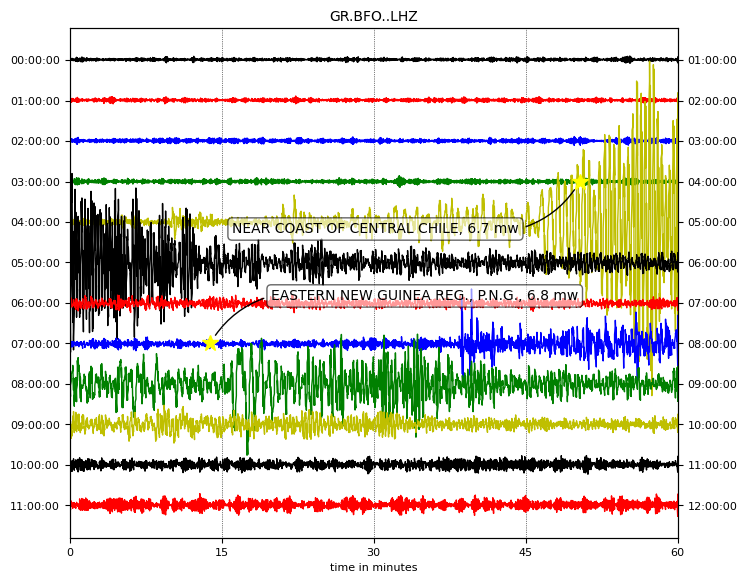

In [8]:
# Including event information in the plot
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2)
st.plot(type="dayplot", interval=60, right_vertical_labels=True,
        vertical_scaling_range=5e3, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g', 'y'], show_y_UTC_label=False,
        events={'min_magnitude': 6.0}, show = False)

In [9]:
# Plotting a Record Station
# A record section can be plotted from a Stream object by setting parameter type to 'section'
tr = singlechannel[0]
print(tr.stats)

# For instance; stream.plot(type='section')
# This wouldn't work as of now since we don't have the apt data

         network: DK
         station: COP
        location: 
         channel: BHZ
       starttime: 2009-02-19T00:00:00.025100Z
         endtime: 2009-02-19T23:59:59.975100Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 552, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 2260992})


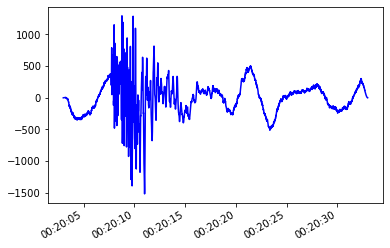

In [10]:
# Custom plotting using Matplotlib
import matplotlib.pyplot as plt

st = read()
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()